In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['KaiTi']  #指定默认字体 SimHei黑体
plt.rcParams['axes.unicode_minus'] = False   #解决保存图像是负号'
import jieba
stop_list  = pd.read_csv('E:\停用词表\stopwords-master\cn_stopwords.txt',index_col=False,quoting=3,
                         sep="\t",names=['stopword'], encoding='utf-8')

# jieba分词

In [2]:
#Jieba分词函数
def txt_cut(juzi):
    lis=[w for w in jieba.lcut(juzi) if w not in stop_list.values]
    return " ".join(lis)
 
df=pd.read_csv("D:\\python data\\第二轮考核\\data\\news_train.csv",encoding='gb18030')
data=pd.DataFrame()
data['label']=df['标签']
data['cutword']=df['新闻'].astype('str').apply(txt_cut)
data

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\yuan\AppData\Local\Temp\jieba.cache
Loading model cost 0.373 seconds.
Prefix dict has been built successfully.


,label,cutword
0,4,三大 因素 促 房地产 复苏 机构 认为 增持 目前 主流 地产股 动态 市盈率 接近 ...
1,9,哈佛 北京 校友会 设立 哈佛 中国 学子 基金 哈佛 北京 校友会 日前 设立 哈佛 北京...
2,9,情况 摸底 盘点 三大 国家 留学 行情 高考 结束 留学 旺季 随之而来 无论是 远 赴 ...
3,8,印度 批准 23.5 亿美元 购买 俄罗斯 航母 ( 图 ) 新华网 孟买 月 10 日电 ...
4,9,五年级 写 论文 个性 帝 落户 美国 名校 ( 图 ) 校园 牛 ◎ 姓名 ◎ 学校 ...
...,...,...
9995,8,台当局 称遭 索马里 海盗 挟持 渔船 船员 平安 中新网 月 12 日电 中央社 报道...
9996,8,国税 总局 取消 城市 房地产 税利 公平 税负 新华网 北京 月 23 日电 （ 记者 王...
9997,10,白 魔鬼 身披 奇才 00 号 亮相 对位 妹夫 10 分钟 助攻 ( 图 ) 新浪 体...
9998,1,组图 谭晶献 唱 关云长 主题曲 大赞 电影 好看 新浪 娱乐 讯 即将 月 28 ...


# 将文本变为数组

In [3]:
from os import listdir
from keras.preprocessing import sequence
import keras.preprocessing
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
# 将文件分割成单字, 建立词索引字典     
tok = Tokenizer(num_words=6000)
tok.fit_on_texts(data['cutword'].values)
print("样本数 : ", tok.document_count)
print({k: tok.word_index[k] for k in list(tok.word_index)[:100]})

样本数 :  10000
{'中': 1, '\xa0': 2, '月': 3, '年': 4, '一个': 5, '中国': 6, '会': 7, '说': 8, '基金': 9, '日': 10, '没有': 11, '市场': 12, '更': 13, '已经': 14, '表示': 15, '时': 16, '学生': 17, '公司': 18, '美国': 19, '记者': 20, '分': 21, '—': 22, '时间': 23, '10': 24, '游戏': 25, '投资': 26, '进行': 27, '北京': 28, '新': 29, '可能': 30, '目前': 31, '现在': 32, '问题': 33, '银行': 34, '发展': 35, '电影': 36, '留学': 37, '做': 38, '认为': 39, '项目': 40, '很多': 41, '非常': 42, '比赛': 43, '成为': 44, '大学': 45, '经济': 46, '工作': 47, '企业': 48, '需要': 49, '今年': 50, '选择': 51, '元': 52, '前': 53, '情况': 54, '里': 55, '出现': 56, '房地产': 57, '国际': 58, '12': 59, '新浪': 60, '这种': 61, '国家': 62, '发现': 63, '玩家': 64, '之后': 65, '高': 66, '申请': 67, '研究': 68, '11': 69, '20': 70, '·': 71, '主要': 72, '希望': 73, '活动': 74, '想': 75, '方面': 76, '亿元': 77, '影响': 78, '设计': 79, '要求': 80, '获得': 81, '出': 82, '英国': 83, '包括': 84, '提供': 85, '生活': 86, '重要': 87, '不同': 88, '能够': 89, '世界': 90, '不会': 91, '得到': 92, '产品': 93, '比较': 94, '学校': 95, '…': 96, '1': 97, '30': 98, '一直': 99, '表现': 100}


20     59
111    48
27     48
67     47
23     47
       ..
135    21
251    21
189    21
236    21
114    21
Length: 207, dtype: int64


<Axes: >

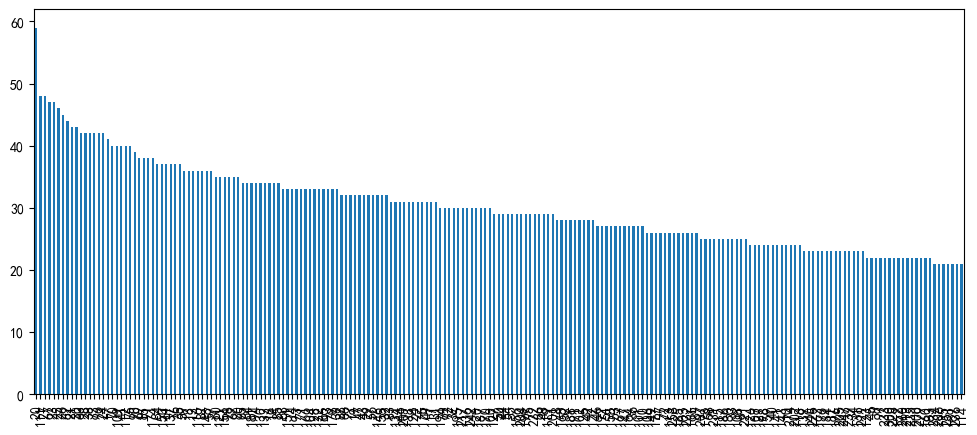

In [4]:
X= tok.texts_to_sequences(data['cutword'].values)
#查看x的长度的分布
length=[]
for i in X:
    length.append(len(i))
v_c=pd.Series(length).value_counts()
print(v_c[v_c>20])  #频率大于50才展现
v_c[v_c>20].plot(kind='bar',figsize=(12,5))
#得出长度为20的是最多的，长度为114的最少，为21。所以打算截长度为90

In [5]:
# 将序列数据填充成相同长度 
from tensorflow import keras 
from keras.preprocessing import sequence
X=  keras.preprocessing.sequence.pad_sequences(X, maxlen=90)
print(X.shape)
Y=data['label'].values
print(Y.shape)

(10000, 90)
(10000,)


In [6]:
Y = to_categorical(Y)
Y.shape

(10000, 11)

# 构建神经网络

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Reshape,Flatten,Dense,Dropout,Input,Conv2D,MaxPool2D,concatenate
filter_size=[3,4,5]
def convolution():
    inn=Input(shape=(90,100,1))
    cnns=[]
    for size in filter_size:
        conv=Conv2D(64,(size,100),
                           strides=1,padding='valid',activation='relu')(inn)
        #将64个特征池化
        pool=MaxPool2D(pool_size=(90-size+1,1),padding='valid')(conv)
        cnns.append(pool)
        
        #将所有特征图拼在一起
    outt=concatenate(cnns)
        
    model=keras.Model(inputs=inn,outputs=outt)
    return model
    

def cnn_mulfilter():
    model=Sequential()
    model.add(Embedding(input_dim=6000,output_dim=100,input_length=90))
    model.add(Reshape((90,100,1)))
    model.add(convolution())
    model.add(Flatten())
    model.add(Dense(11,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(11,activation='sigmoid'))
    
    model.compile(optimizer=keras.optimizers.Adam(),
                 loss=keras.losses.BinaryCrossentropy(),
                 metrics=['accuracy'])
    return model

model=cnn_mulfilter()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 90, 100)           600000    
                                                                 
 reshape (Reshape)           (None, 90, 100, 1)        0         
                                                                 
 model (Functional)          (None, 1, 1, 192)         76992     
                                                                 
 flatten (Flatten)           (None, 192)               0         
                                                                 
 dense (Dense)               (None, 11)                2123      
                                                                 
 dropout (Dropout)           (None, 11)                0         
                                                                 
 dense_1 (Dense)             (None, 11)                1

# 训练模型

In [8]:
history = model.fit(X,Y,batch_size=64,epochs=10,validation_split=0.1)

Epoch 1/10
141/141 [==============================] - 3s 19ms/step - loss: 0.4626 - accuracy: 0.1540 - val_loss: 0.2231 - val_accuracy: 0.4230
Epoch 2/10
141/141 [==============================] - 2s 17ms/step - loss: 0.2278 - accuracy: 0.5002 - val_loss: 0.1376 - val_accuracy: 0.8240
Epoch 3/10
141/141 [==============================] - 2s 17ms/step - loss: 0.1682 - accuracy: 0.6623 - val_loss: 0.1047 - val_accuracy: 0.8930
Epoch 4/10
141/141 [==============================] - 2s 17ms/step - loss: 0.1396 - accuracy: 0.7294 - val_loss: 0.0895 - val_accuracy: 0.9070
Epoch 5/10
141/141 [==============================] - 2s 17ms/step - loss: 0.1249 - accuracy: 0.7720 - val_loss: 0.0814 - val_accuracy: 0.9160
Epoch 6/10
141/141 [==============================] - 2s 17ms/step - loss: 0.1124 - accuracy: 0.7959 - val_loss: 0.0821 - val_accuracy: 0.9080
Epoch 7/10
141/141 [==============================] - 3s 18ms/step - loss: 0.1048 - accuracy: 0.8159 - val_loss: 0.0793 - val_accuracy: 0.9060

# 导入测试集

In [9]:
df2=pd.read_csv('D:\\python data\\第二轮考核\\data\\news_test_no_answer.csv',encoding='gb18030')
test=pd.DataFrame()
test['cutword']=df2['新闻'].astype('str').apply(txt_cut)
test

,cutword
0,时评 上海 豪宅 热销 上周 位于 上海浦东 锦绣路 高档 住宅 星河 ( blog ) 湾...
1,海外 观察 美国 父母 子女 绝对 权力 一个 家庭 不论是 母亲 父亲 未成年 子女 有着...
2,麦兜 响当当 明天 公映 宋丹丹 谈麦 太 几度 哽咽 晨报 记者 彭骥 报道 明天...
3,马来西亚 河流 现 不明 物 疑似 30 米长 巨蛇 ( 图 ) 新浪 科技 讯 北京 ...
4,外太空 拍摄 世界 河流 图景 美丽 背后 藏 危机 ( 组图 ) 河流 连接 大地 海洋 ...
...,...
1994,饱受 争议 一次 行为艺术 ( 图 ) 砸 钢琴 谭盾 饱受 争议 一次 行为艺术 做 艺术...
1995,镜子 装裱 ( 图 ) 镜子 装裱 切割成 多边形 镜子 需要 复杂 装裱 喜欢 形状 排列...
1996,13 条 公交线 周三 调整 百里 长线 732 路 743 路 撤销 新开 条 公交线 公...
1997,永安 百货 五店 携手 会员 尊享 多重 优惠 ( 图 ) 活动 时间 2009.4 ....


# 将对应的文字转换成，上文一样的数字编号

In [10]:
test_x= tok.texts_to_sequences(test['cutword'].values)

In [11]:
# 将序列数据填充成相同长度 
from tensorflow import keras 
from keras.preprocessing import sequence
test_x= keras.preprocessing.sequence.pad_sequences(test_x, maxlen=90)
print(test_x.shape)


(1999, 90)


In [12]:
predictions=model.predict(test_x)
print('输出结果：\n',predictions)

63/63 [==============================] - 0s 3ms/step
输出结果：
 [[8.08589307e-10 5.36455824e-10 3.07155116e-19 ... 1.08934979e-11
  2.71862199e-09 4.30482039e-12]
 [5.24673611e-04 1.71463282e-04 9.25791450e-04 ... 2.15946715e-02
  3.69470298e-01 4.36383052e-05]
 [4.32712560e-10 8.17057788e-01 1.40584659e-14 ... 4.46993421e-04
  3.77061078e-05 1.58631374e-04]
 ...
 [1.30440914e-09 6.62334033e-12 1.05623605e-20 ... 1.08464439e-13
  1.39766931e-12 6.25732105e-14]
 [3.00957327e-04 1.84991154e-06 1.55107301e-07 ... 9.37961104e-08
  2.61708738e-06 3.43724751e-05]
 [1.69879822e-05 1.08726683e-09 4.01264334e-11 ... 2.22380891e-06
  5.58877473e-05 4.60738875e-06]]


# 概率列表转为独热编码

In [13]:
def trans_to_onehot(X):
    result=[]
    for i in range(len(X)):
        max=0
        max_index=0
        result2=[]
        for j in range(len(X[i])):
            if X[i][j]>max:
                max=X[i][j]
                max_index=j
        for k in range(len(X[i])):
            if k !=max_index:
                result2.append(0)
            else:
                result2.append(1)

        result.append(result2)
    return result

In [14]:
result=trans_to_onehot(predictions)
result

[[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1,

# 独热编码转标签

In [15]:
import numpy
lebal = [np.argmax(one_hot)for one_hot in result]
lebal

[4,
 9,
 1,
 6,
 6,
 6,
 4,
 1,
 1,
 4,
 1,
 7,
 6,
 2,
 5,
 8,
 1,
 2,
 2,
 5,
 2,
 9,
 7,
 6,
 4,
 2,
 8,
 8,
 2,
 10,
 2,
 6,
 6,
 5,
 1,
 5,
 5,
 5,
 2,
 1,
 9,
 6,
 1,
 7,
 7,
 3,
 9,
 8,
 8,
 4,
 6,
 10,
 1,
 2,
 6,
 2,
 3,
 6,
 1,
 7,
 8,
 10,
 8,
 5,
 1,
 8,
 7,
 8,
 5,
 2,
 5,
 3,
 10,
 8,
 10,
 5,
 1,
 7,
 1,
 9,
 2,
 7,
 8,
 4,
 3,
 10,
 3,
 7,
 6,
 8,
 3,
 2,
 8,
 8,
 5,
 10,
 3,
 2,
 1,
 6,
 1,
 3,
 2,
 2,
 1,
 9,
 8,
 6,
 3,
 5,
 1,
 10,
 10,
 2,
 10,
 1,
 7,
 10,
 1,
 6,
 1,
 10,
 7,
 3,
 3,
 5,
 5,
 6,
 1,
 9,
 10,
 8,
 9,
 7,
 1,
 3,
 1,
 10,
 4,
 7,
 10,
 4,
 3,
 9,
 4,
 3,
 1,
 5,
 8,
 7,
 9,
 8,
 10,
 4,
 3,
 4,
 1,
 7,
 1,
 6,
 6,
 10,
 6,
 7,
 3,
 10,
 3,
 10,
 7,
 7,
 10,
 1,
 9,
 10,
 4,
 3,
 1,
 1,
 1,
 1,
 10,
 10,
 2,
 8,
 2,
 4,
 4,
 6,
 6,
 2,
 7,
 3,
 2,
 9,
 8,
 5,
 6,
 3,
 4,
 7,
 3,
 6,
 10,
 5,
 7,
 9,
 2,
 3,
 2,
 8,
 8,
 9,
 8,
 7,
 3,
 3,
 5,
 5,
 2,
 3,
 3,
 7,
 1,
 4,
 10,
 1,
 2,
 6,
 5,
 6,
 9,
 5,
 6,
 5,
 3,
 3,
 10,
 10,
 10,
 5,
 1,
 9,
 8,


# 将list列表导出为csv文件

In [16]:
outcome=np.vstack(lebal)
print(outcome)
np.savetxt("D:\\python data\\第二轮考核\\data\\niubiniubi4.csv", outcome)

[[4]
 [9]
 [1]
 ...
 [4]
 [6]
 [7]]
